# Artificial Neural Network from Scratch

In this notebook, I implemented a simple two-layer neural network and trained it on the MNIST digit recognizer dataset. It's meant to be an instructional example, through which you can understand the underlying math of neural networks better.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [14]:
X_dev.shape

(784, 1000)

In [15]:
Y_dev

array([8, 7, 3, 7, 9, 9, 5, 1, 7, 1, 9, 9, 5, 0, 8, 9, 2, 4, 5, 7, 0, 9,
       6, 8, 7, 7, 4, 1, 5, 0, 8, 6, 0, 3, 9, 7, 6, 0, 9, 4, 1, 0, 1, 2,
       8, 2, 3, 4, 7, 1, 5, 2, 7, 1, 8, 4, 7, 6, 7, 3, 6, 9, 0, 8, 2, 5,
       4, 1, 1, 0, 2, 1, 1, 6, 7, 2, 8, 0, 7, 2, 4, 5, 8, 9, 7, 3, 1, 0,
       9, 3, 1, 7, 6, 0, 3, 8, 2, 6, 6, 0, 1, 5, 7, 1, 5, 9, 9, 7, 1, 7,
       6, 9, 2, 0, 4, 0, 9, 2, 5, 8, 4, 7, 9, 5, 2, 7, 5, 0, 8, 5, 1, 8,
       9, 1, 5, 6, 5, 3, 3, 4, 6, 1, 9, 8, 3, 3, 6, 8, 9, 1, 8, 0, 0, 1,
       9, 9, 9, 3, 6, 1, 4, 7, 3, 3, 5, 9, 3, 2, 1, 2, 5, 0, 1, 7, 5, 1,
       8, 1, 4, 1, 4, 0, 9, 2, 1, 9, 2, 2, 5, 8, 9, 1, 1, 1, 2, 8, 4, 0,
       6, 3, 4, 3, 7, 3, 6, 8, 9, 9, 3, 3, 9, 5, 2, 2, 9, 6, 8, 3, 4, 2,
       8, 0, 1, 2, 2, 8, 3, 5, 5, 6, 3, 9, 8, 7, 0, 4, 4, 7, 0, 6, 9, 8,
       9, 4, 9, 5, 8, 7, 4, 5, 3, 5, 2, 3, 1, 7, 6, 7, 5, 0, 0, 5, 9, 1,
       6, 2, 2, 5, 3, 7, 8, 1, 0, 0, 9, 8, 0, 3, 6, 2, 1, 1, 1, 2, 0, 8,
       2, 1, 7, 1, 2, 1, 7, 7, 0, 7, 3, 5, 6, 3, 5,

In [10]:
Y_train.shape

(41000,)

In [9]:
X_train[:,0].shape

(784,)

Our NN will have a simple two-layer architecture. Input layer $a^{[0]}$ will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer $a^{[1]}$ will have 10 units with ReLU activation, and finally our output layer $a^{[2]}$ will have 10 units corresponding to the ten digit classes with softmax activation.

**Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

**Vars and shapes**

Forward prop

- $A^{[0]} = X$: 784 x m
- $Z^{[1]} \sim A^{[1]}$: 10 x m
- $W^{[1]}$: 10 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 10 x 1
- $Z^{[2]} \sim A^{[2]}$: 10 x m
- $W^{[1]}$: 10 x 10 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 10 x 1

Backprop

- $dZ^{[2]}$: 10 x m ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 10
- $dB^{[2]}$: 10 x 1
- $dZ^{[1]}$: 10 x m ($~A^{[1]}$)
- $dW^{[1]}$: 10 x 10
- $dB^{[1]}$: 10 x 1

In [11]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [12]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [13]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 7 9 ... 7 7 1] [5 5 0 ... 1 7 9]
0.11153658536585366
Iteration:  10
[2 7 2 ... 7 2 6] [5 5 0 ... 1 7 9]
0.13870731707317074
Iteration:  20
[8 7 2 ... 7 2 6] [5 5 0 ... 1 7 9]
0.17434146341463413
Iteration:  30
[7 7 2 ... 7 2 6] [5 5 0 ... 1 7 9]
0.21048780487804877
Iteration:  40
[7 7 2 ... 3 2 6] [5 5 0 ... 1 7 9]
0.2456829268292683
Iteration:  50
[7 2 2 ... 3 2 6] [5 5 0 ... 1 7 9]
0.282390243902439
Iteration:  60
[7 6 2 ... 1 2 6] [5 5 0 ... 1 7 9]
0.34448780487804875
Iteration:  70
[8 6 2 ... 1 2 6] [5 5 0 ... 1 7 9]
0.39302439024390246
Iteration:  80
[8 6 6 ... 1 2 6] [5 5 0 ... 1 7 9]
0.4360731707317073
Iteration:  90
[8 6 6 ... 1 7 6] [5 5 0 ... 1 7 9]
0.4708292682926829
Iteration:  100
[8 6 6 ... 1 7 6] [5 5 0 ... 1 7 9]
0.5051951219512195
Iteration:  110
[8 6 6 ... 1 7 4] [5 5 0 ... 1 7 9]
0.5329756097560976
Iteration:  120
[3 6 6 ... 1 7 4] [5 5 0 ... 1 7 9]
0.5582439024390244
Iteration:  130
[3 6 6 ... 1 7 4] [5 5 0 ... 1 7 9]
0.5809756097560975
Iteration:  

~85% accuracy on training set.

In [14]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Let's look at a couple of examples:

Prediction:  [5]
Label:  5


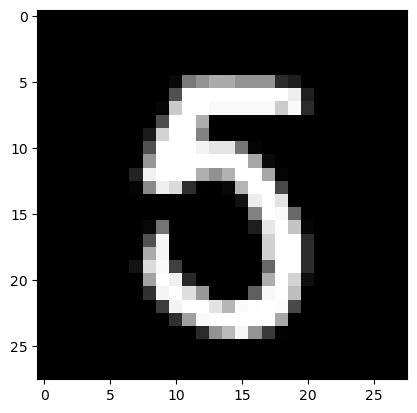

Prediction:  [6]
Label:  5


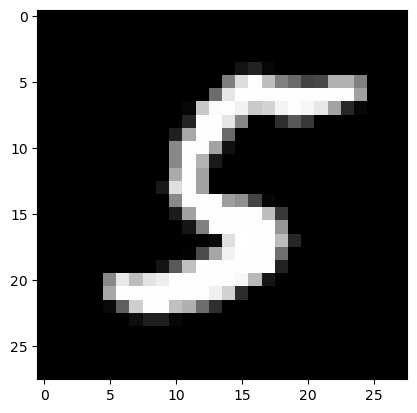

Prediction:  [0]
Label:  0


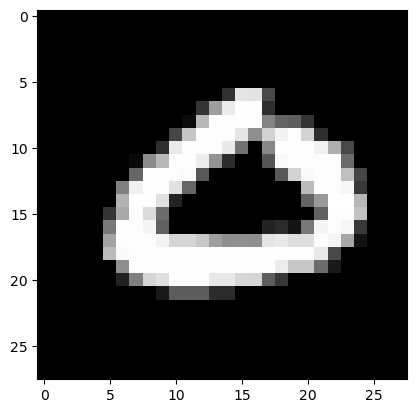

Prediction:  [0]
Label:  0


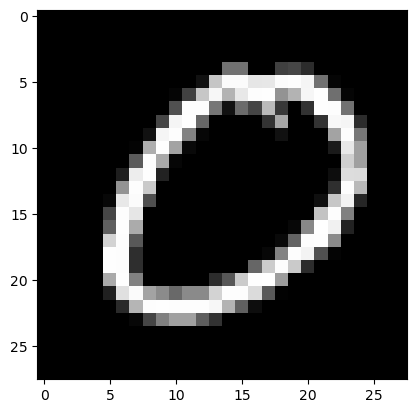

In [15]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Finally, let's find the accuracy on the dev set:

In [16]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 8 2 4 9 1 0 0 7 4 5 7 5 7 7 3 6 3 9 0 8 3 1 1 0 5 5 9 5 6 7 5 7 9 2 2 8
 1 7 0 8 7 0 3 6 4 6 0 4 6 3 3 7 4 2 5 3 8 4 9 8 1 1 6 6 4 1 4 8 4 9 8 2 9
 7 2 6 6 8 1 0 8 7 3 1 9 2 7 7 1 8 6 6 6 7 2 9 4 4 7 3 2 6 7 0 3 7 8 3 7 0
 7 5 0 6 3 1 6 4 9 3 2 0 7 5 4 6 0 1 6 5 7 8 8 5 2 6 4 6 1 3 5 9 6 1 8 9 2
 0 2 6 2 5 7 9 8 4 3 8 7 6 4 8 2 7 7 4 3 0 0 4 3 8 2 2 5 9 8 2 8 8 7 2 0 4
 2 1 3 7 0 3 3 0 6 4 9 1 3 8 7 2 6 2 1 3 7 3 3 8 5 0 6 8 1 4 4 1 4 4 1 6 2
 8 4 8 6 9 1 6 0 0 6 0 4 4 9 0 3 0 8 6 3 4 0 6 1 2 1 7 6 6 3 0 8 6 7 7 7 7
 1 1 1 3 5 4 8 6 9 0 9 9 7 0 9 9 1 8 1 1 6 0 7 3 3 8 7 5 3 7 3 0 5 0 8 2 2
 8 1 8 3 4 5 1 3 3 9 7 4 2 0 8 9 4 0 1 2 7 2 6 4 3 7 6 0 1 6 4 1 2 3 2 2 4
 3 3 6 7 1 7 9 4 2 6 8 6 4 0 6 9 7 0 7 1 5 1 5 4 7 7 8 3 5 1 0 2 9 3 2 9 5
 6 8 3 4 1 1 1 0 3 1 7 4 1 5 9 5 6 5 2 5 8 4 1 1 8 3 7 6 7 9 7 4 9 3 1 6 8
 9 2 2 8 0 7 1 3 3 8 4 5 2 8 6 2 4 1 9 9 1 2 9 6 1 7 0 8 0 7 8 8 7 5 5 4 1
 5 0 2 9 2 1 2 2 0 9 8 9 7 3 9 3 8 7 2 3 3 7 8 1 9 5 0 0 3 5 2 5 9 1 4 0 9
 2 6 3 5 4 5 6 6 2 7 8 1 

0.821

Still 84% accuracy, so our model generalized from the training data pretty well.

# Task 
1. Improve the model accuracy by tuning the number of layers, neurons, and learning rate values.
2. Compare a simple and dense network model with visualizations of loss & accuracy plots.
3. Learn how to calculate the parameters of a model and why we calculate parameters(this will help you in LLMs training)
4. Add a confusion matrix and classification report.